# Minería de datos
### PRA2 - Proyecto de minería de datos

Oliver Luque Caballero

4t cuatrimestre. Junio 2024

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import export_text
import matplotlib.backends.backend_pdf
from sklearn.ensemble import RandomForestClassifier

## Introducción

Empezamos cargando el csv de la anterior práctica.

In [36]:
df=pd.read_csv('finaldata.csv')
df_original = df.copy()
df.head(n=20)

age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    52    1   1     125.0  212.0    0        1    168.0      0      1.0   
1    53    1   1     140.0  203.0    1        0    155.0      1      3.1   
2    70    1   1     145.0  174.0    0        1    125.0      1      2.6   
3    61    1   1     148.0  203.0    0        1    161.0      0      0.0   
4    58    0   1     100.0  248.0    0        0    122.0      0      1.0   
5    55    1   1     160.0  289.0    0        0    145.0      1      0.8   
6    46    1   1     120.0  249.0    0        0    144.0      0      0.8   
7    54    1   1     122.0  286.0    0        0    116.0      1      3.2   
8    71    0   1     112.0  149.0    0        1    125.0      0      1.6   
9    43    0   1     132.0  341.0    1        0    136.0      1      3.0   
10   34    0   2     118.0  210.0    0        1    192.0      0      0.7   
11   52    1   1     128.0  204.0    1        1    156.0      1      1.0   
12   34    0   2     118.0  210.0    0        1    192.0      0      0.7   
13   51    0   3     140.0  308.0    0        0    142.0      0      1.5   
14   54    1   1     124.0  266.0    0        0    109.0      1      2.2   
15   50    0   2     120.0  244.0    0        1    162.0      0      1.1   
16   58    1   3     140.0  211.0    1        0    165.0      0      0.0   
17   60    1   3     140.0  185.0    0        0    155.0      0      3.0   
18   67    0   1     106.0  223.0    0        1    142.0      0      0.3   
19   45    1   1     104.0  208.0    0        0    148.0      1      3.0   

    slope   ca  thal  target  tension  chol_age_ratio  
0       2  2.0     3       0        1        4.076923  
1       0  0.0     3       0        3        3.830189  
2       0  0.0     3       0        3        2.485714  
3       2  1.0     3       0        3        3.327869  
4       1  0.0     2       1        0        4.275862  
5       1  1.0     3       0        3        5.254545  
6       2  0.0     3       0        1        5.413043  
7       1  2.0     2       0        1        5.296296  
8       1  0.0     2       1        0        2.098592  
9       1  0.0     3       0        2        7.930233  
10      2  0.0     2       1        0        6.176471  
11      1  0.0     0       0        1        3.923077  
12      2  0.0     2       1        0        6.176471  
13      2  1.0     2       1        3        6.039216  
14      1  1.0     3       0        1        4.925926  
15      2  0.0     2       1        1        4.880000  
16      2  0.0     2       1        3        3.637931  
17      1  0.0     2       0        3        3.083333  
18      2  2.0     2       1        0        3.328358  
19      1  0.0     2       1        0        4.622222

## Ejercicio 1
### 1.1 Se genera un modelo no supervisado.

KMeans es un algoritmo de clustering ampliamente utilizado que asigna puntos de datos a clústeres basándose en la minimización de la suma de las distancias cuadradas entre los puntos y el centroide del clúster.

Considero que dada la naturaleza del problema (predecir si una persona padecerá cardiopatías), KMeans puede ser efectivo para identificar patrones en los datos, agrupando las observaciones en clústeres que comparten características similares.

Empezamos normalizando los datos y seguimos realizando el método del codo (Elbow Method) para determinar el número óptimo de clústeres.


In [37]:
scaler = StandardScaler()
select = ['age','chol','thalach','oldpeak','chol_age_ratio']
df_scaled = scaler.fit_transform(df[select])
df_scaled = pd.DataFrame(df_scaled, columns=select)


#### Elbow method
Este método se basa en la idea de que la suma de los cuadrados de las distancias intra-cluster, disminuye a medida que aumenta el número de clusters, pero a partir de cierto punto, los beneficios de agregar más clusters comienzan a disminuir.

El método del codo consiste en calcular la suma de cuadrados dentro del cluster para diferentes valores de k (número de clusters) y trazar un gráfico que represente la suma de cuadrados en función de k.

El objetivo de crear el siguiente gráfico es encontrar el número de clusters que proporciona la mejor estructura de agrupamiento posible, evitando tanto la subagrupación como la sobreagrupación.


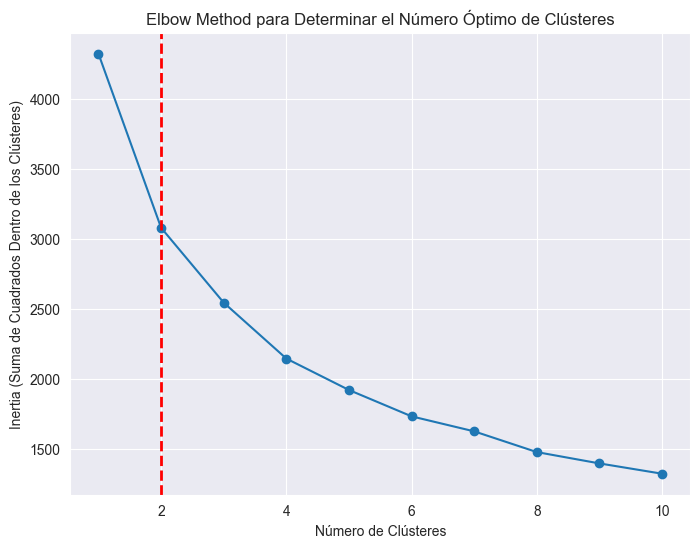

In [38]:
cluster_range = range(1, 11)
inertia = []

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot del Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method para Determinar el Número Óptimo de Clústeres')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inertia (Suma de Cuadrados Dentro de los Clústeres)')
plt.axvline(x=2, color='red', linestyle='--', linewidth=2)  
plt.grid(True)
plt.show()

Podemos ver como el codo se encuentra en el número 2.

#### Average silhouette

El objetivo del método de Silhouette es evaluar la calidad de un agrupamiento (clustering) y determinar cómo de bien se encuentran las observaciones dentro de su respectivo grupo.

Para ello compara la distancia promedio entre una observación y todas las demás observaciones en su propio grupo (distancia intra-cluster) con la distancia promedio entre la observación y todas las observaciones en el grupo más cercano (distancia inter-cluster).

La medida de Silhouette varía entre -1 y 1. Un valor de Silhouette cercano a 1 indica que una observación está bien asignada a su grupo y está bien separada de los demás grupos. Por otro lado, un valor cercano a -1 indica que una observación podría estar asignada incorrectamente a su grupo y muestra una mayor similitud con otros grupos.

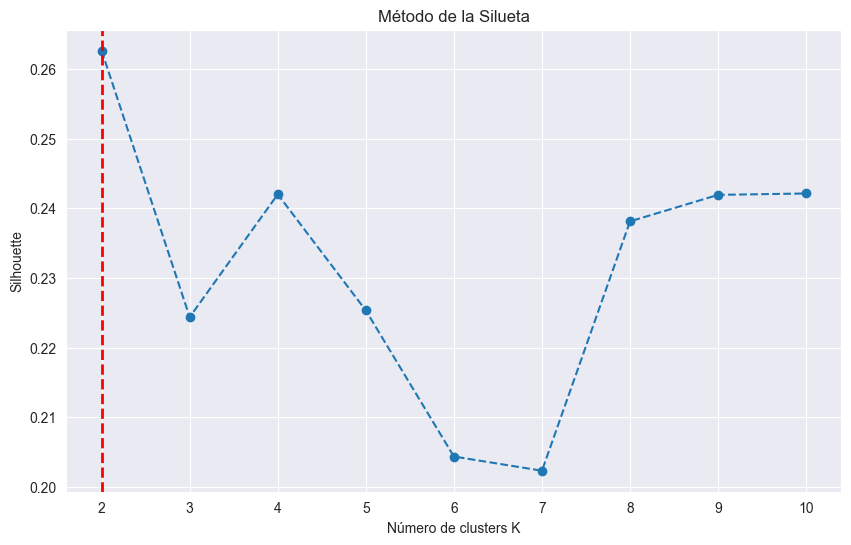

In [39]:
# Función para calcular el coeficiente de silueta promedio para k clusters
def avg_silhouette(k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    return silhouette_avg

# Rango de valores de k
k_values = range(2, 11)

# Calcular los valores promedio de silueta para cada k
avg_sil_values = [avg_silhouette(k) for k in k_values]

# Graficar los valores de silueta
plt.figure(figsize=(10, 6))
plt.plot(k_values, avg_sil_values, marker='o', linestyle='--')
plt.title('Método de la Silueta')
plt.xlabel('Número de clusters K')
plt.ylabel('Silhouette')
plt.xticks(k_values)
plt.axvline(x=2, color='red', linestyle='--', linewidth=2) 
plt.grid(True)
plt.show()

Podemos ver que nuevamente lo ideal es realizar 2. Esto coincide con los dos grupos que tenemos en la variable `target`: 0 y 1.

Vamos a visualizar los k-means

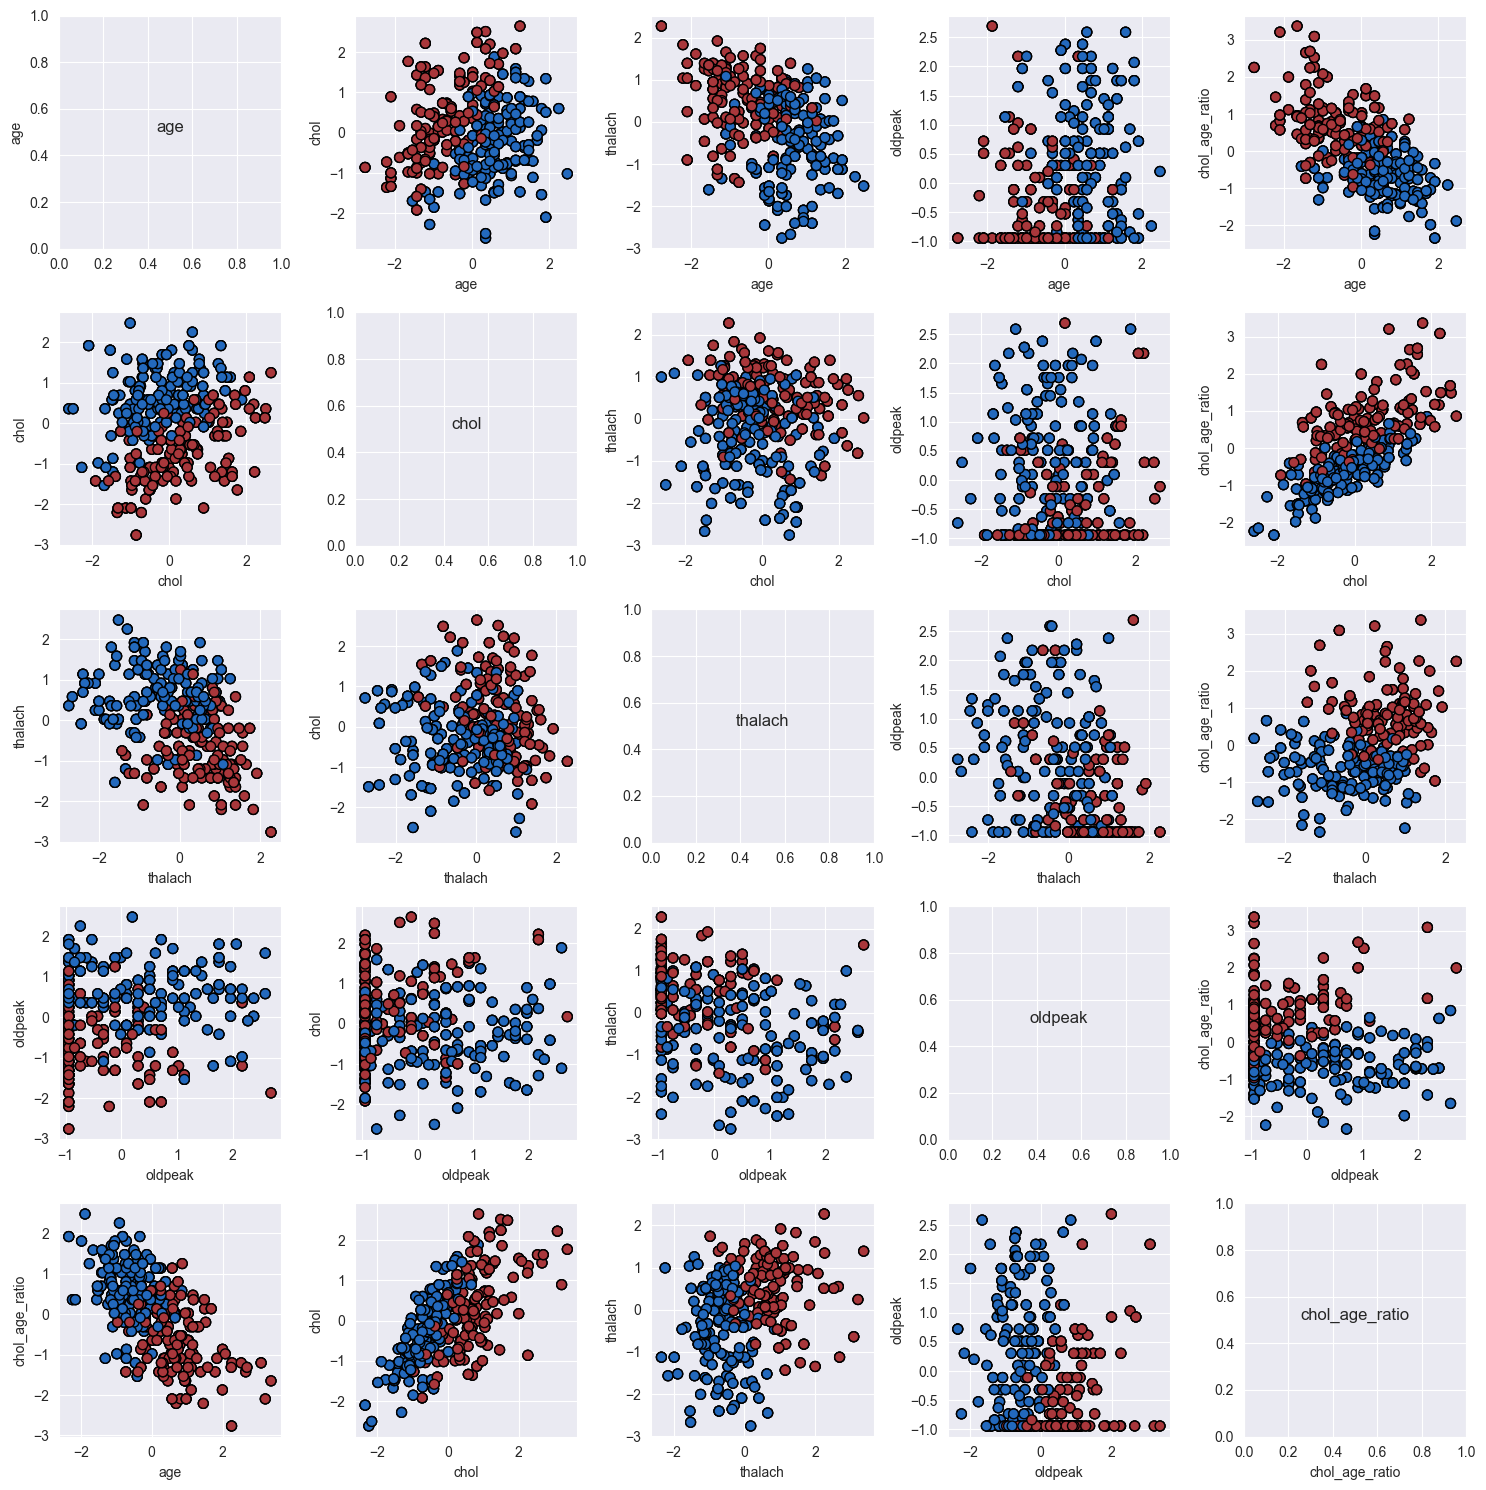

In [40]:
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled)

# Crear subplots para todos los pares de características
num_features = len(select)
fig, axes = plt.subplots(num_features, num_features, figsize=(15, 15))

for i in range(num_features):
    for j in range(num_features):
        if i != j:
            axes[i, j].scatter(df_scaled.iloc[:, i], df_scaled.iloc[:, j], c=df['cluster'], cmap='vlag', marker='o', edgecolor='k', s=50)
            axes[i, j].set_xlabel(select[i])
            axes[i, j].set_ylabel(select[j])
        else:
            axes[i, j].text(0.5, 0.5, select[i], fontsize=12, ha='center')
        
        if i == num_features - 1:
            axes[i, j].set_xlabel(select[j])
        if j == 0:
            axes[i, j].set_ylabel(select[i])

plt.tight_layout()
plt.show()

Ahora podemos compararlo con la distribución real para las mismas variables.

In [41]:
df_target = df_scaled
df_target['target']=df['target']

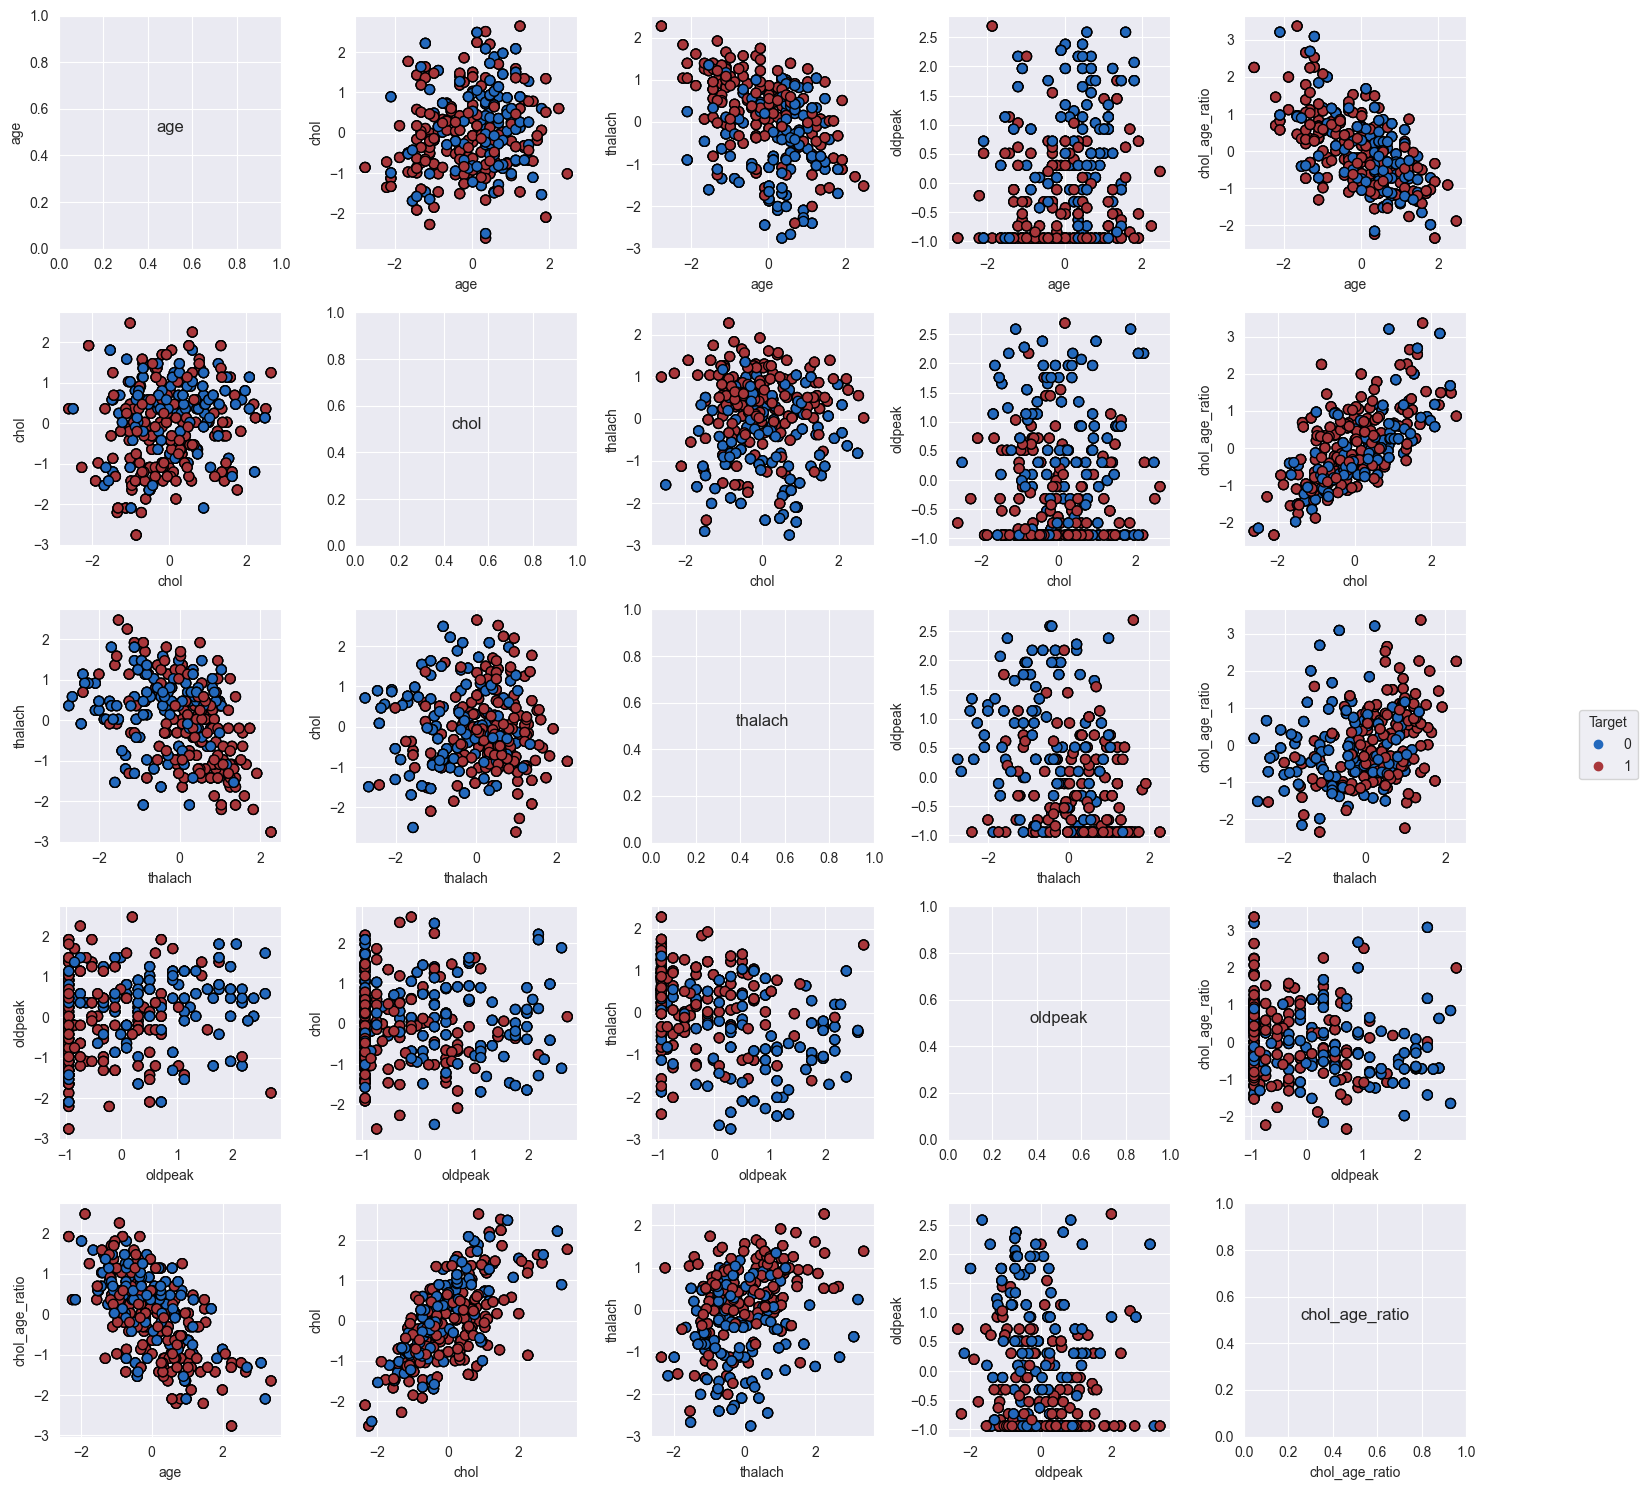

In [42]:
# Crear subplots para todos los pares de características coloreados según la variable target
num_features = len(select)
fig, axes = plt.subplots(num_features, num_features, figsize=(15, 15))

for i in range(num_features):
    for j in range(num_features):
        if i != j:
            scatter = axes[i, j].scatter(df_scaled.iloc[:, i], df_scaled.iloc[:, j], c=df_target['target'], cmap='vlag', marker='o', edgecolor='k', s=50)
            axes[i, j].set_xlabel(select[i])
            axes[i, j].set_ylabel(select[j])
        else:
            axes[i, j].text(0.5, 0.5, select[i], fontsize=12, ha='center')
        
        if i == num_features - 1:
            axes[i, j].set_xlabel(select[j])
        if j == 0:
            axes[i, j].set_ylabel(select[i])

# Añadir una leyenda para la variable target
handles, labels = scatter.legend_elements()
fig.legend(handles, labels, title="Target", loc='center right', bbox_to_anchor=(1.1, 0.5))

plt.tight_layout()
plt.show()

Como es de esperar, la agrupación que hace KMeans es más diferenciada, mientras que si observamos la agrupación real, los valores de las monedas se encuentran más entremezclados.

#### Medidas de calidad del modelo

Silhouette Score

Para evaluar el modelo podemos utilizar Silhouette Score.

Silhouette Score es una métrica de evaluación de la calidad de un modelo de clustering. Mide como de bien están separados los clusters en comparación con como de similares son los puntos dentro del mismo cluster. La puntuación varía de -1 a 1, siendo:

- Un valor cercano a 1 indica que los puntos dentro de un cluster están muy cerca entre sí y bien separados de otros clusters, lo que sugiere una buena calidad de clustering.

- Un valor cercano a 0 indica superposición o proximidad en los límites de los clusters.

- Un valor negativo indica que los puntos podrían estar asignados al cluster incorrecto.

In [43]:
# Calcular el puntaje de silueta promedio
silhouette_avg = silhouette_score(df_scaled, df['cluster'])
print(f'El puntaje de silueta promedio es: {silhouette_avg}')

El puntaje de silueta promedio es: 0.25174312177666863


Podemos ver como el modelo realizado es mejorable, ya que, encontramos un valor bastante cercano a 0. Podría haber superposición entre los clusters o puntos que podrían estar más cerca de otros clusters en comparación con el cluster al que están asignados. Por otro lado, el valor no es negativo lo que indica que los puntos no tienen por qué estar en el cluster incorrecto.

Ahora vamos a comparar los grupos formados por nuestros k-means en comparación a los reales. Para ello vamos a utilizar **Adjusted Rand Index**. Este valor está entre 0 y 1, siendo 1 la coincidencia perfecta y 0 la no coincidencia.

In [44]:
# Calcular el Adjusted Rand Index
ari = adjusted_rand_score(df['target'], df['cluster'])
print(f'El Adjusted Rand Index es: {ari}')

El Adjusted Rand Index es: 0.06532305334054804


Podemos ver claramente como tenemos un valor muy bajo, esto nos indica que hay muy poca coincidencia entre los valores originales de target y los realizados por nosotros.

### 1.3 Se comentan las conclusiones.

Al aplicar KMeans para detectar si los enfermos padecen cardiopatías o no hemos obtenido un Silhouette Score de 0.251, esto indica cierta cohesión en los clusters. Sin embargo, el valor de Adjusted Rand Index (0.065) nos muestra una baja concordancia entre las asignaciones de clusters y las etiquetas reales de las personas con cardiopatías o no.

Como hemos podido observar, la agrupación de KMeans es más diferenciada en comparación con la agrupación real. Esto indica limitaciones en la capacidad del modelo para capturar la complejidad de las relaciones entre las personas con probabilidad a padecer una cardiopatía.

## Ejercicio 2

### 2.1 Se genera de nuevo el modelo no supervisado anterior, pero usando una métrica de distancia distinta.

Como hemos podido observar, la agrupación generada por KMeans muestra cierta cohesión pero no se alinea bien con las etiquetas reales. Para tratar de solucionar este problema podemos utilizar una variante de KMeans que utilice la métrica de distancia coseno.


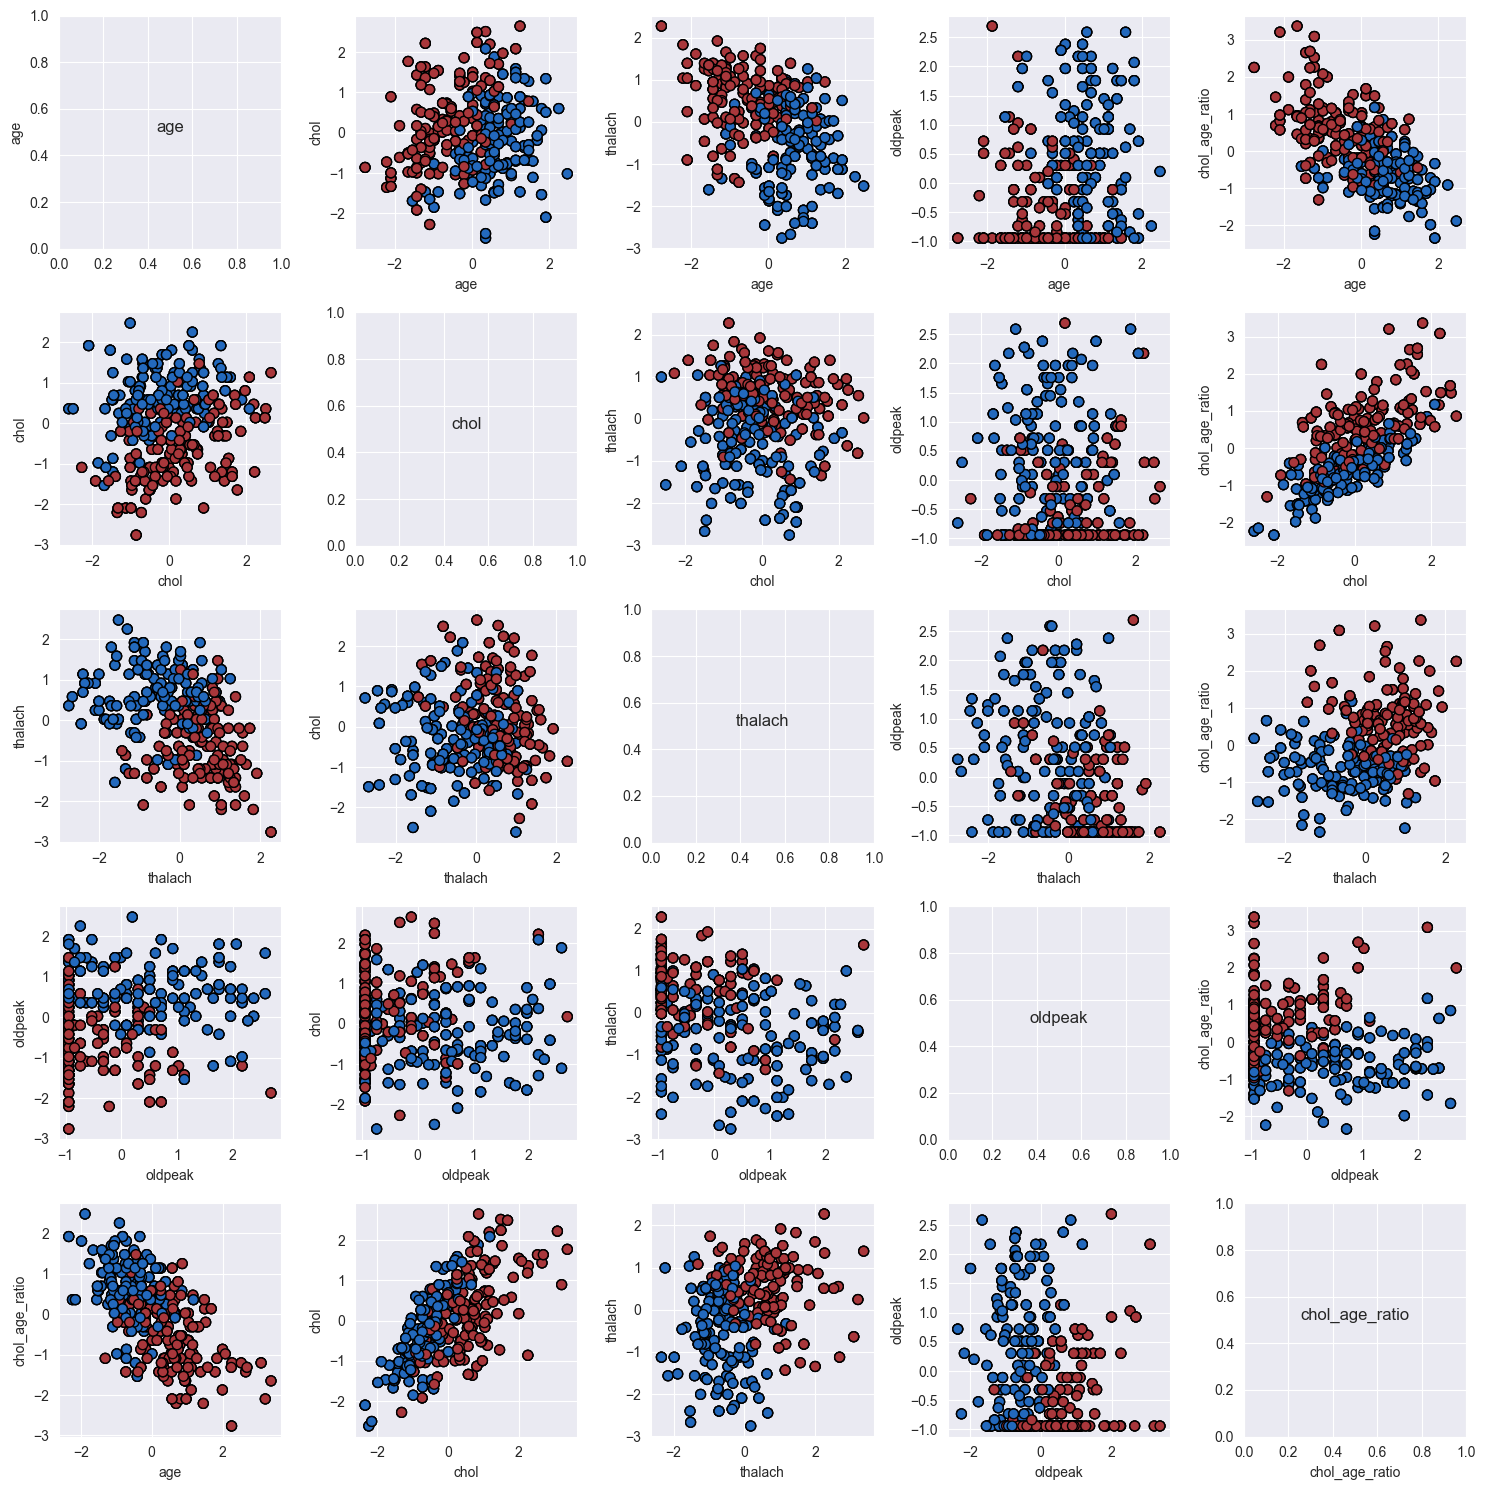

In [45]:
# Distancias coseno entre las muestras
distances = 1 - cosine_distances(df_scaled)

# KMeans en función de las distancias coseno
kmeans_cosine = KMeans(n_clusters=2, random_state=70, n_init=10)
df['cluster_cosine'] = kmeans_cosine.fit_predict(distances)

# Crear subplots para todos los pares de características
num_features = len(select)
fig, axes = plt.subplots(num_features, num_features, figsize=(15, 15))

for i in range(num_features):
    for j in range(num_features):
        if i != j:
            axes[i, j].scatter(df_scaled.iloc[:, i], df_scaled.iloc[:, j], c=df['cluster_cosine'], cmap='vlag', marker='o', edgecolor='k', s=50)
            axes[i, j].set_xlabel(select[i])
            axes[i, j].set_ylabel(select[j])
        else:
            axes[i, j].text(0.5, 0.5, select[i], fontsize=12, ha='center')
        
        if i == num_features - 1:
            axes[i, j].set_xlabel(select[j])
        if j == 0:
            axes[i, j].set_ylabel(select[i])

plt.tight_layout()
plt.show()

### 2.2 Se muestran y comentan las medidas de calidad del modelo generado.

Vamos a utilizar los índices utilizados anteriormente:

In [46]:
print(f"Silhouette Score (Coseno): {silhouette_score(distances, df['cluster_cosine'])}")
ari = adjusted_rand_score(df['target'], df['cluster_cosine'])
print(f'El Adjusted Rand Index es: {ari}')

Silhouette Score (Coseno): 0.35288798444109903
El Adjusted Rand Index es: 0.10300885916679611


Un valor de 0.3549 indica que los clusters generados por el modelo con distancia coseno tienen una decente cohesión interna y están bien separados entre sí. Este valor cercano no muy cercano a 1 sugiere una estructura de clustering no del todo sólida.

Un valor de 0.10 indica que la correspondencia con las etiquetas reales es bastante baja.

Estos resultados nos indican que, aunque los clusters generados son coherentes entre sí, la relación con las categorías reales de criptomonedas es limitada.

### 2.3 Adicionalmente se comparan los dos modelos no supervisados con métricas de distancia distintas.

Procedemos a comparar los resultados de los dos modelos de clustering, el primero realizado en la métrica de distancia euclidiana y el segundo en la métrica de distancia coseno, podemos observar las diferencias:

Si comparamos los resultados de los dos modelos de clustering, uno basado en la métrica de distancia euclidiana y el otro en la métrica de distancia coseno, podemos observar las siguientes diferencias:

**Silhouette Score**:

* Modelo con Distancia Euclidiana: 0.252

* Modelo con Distancia Coseno: 0.352

El Silhouette Score con distancia coseno es considerablemente algo más alto, indicando que los clusters generados por este modelo tienen una mejor cohesión interna y separación entre clusters en comparación con el modelo de distancia euclidiana.

**Adjusted Rand Index**:

* Modelo con Distancia Euclidiana: 0.065

* Modelo con Distancia Coseno: 0.103

Ambos modelos muestran valores bajos, pero el modelo con distancia coseno tiene un valor ARI bastante más superior, sugiriendo una concordancia ligeramente mejor con las etiquetas reales.

### 2.4 Se comentan las conclusiones.

Podemos ver como los dos modelos tienen valores bastante bajos, esto provoca que el modelo no sea el más adecuado para predecir las personas con cardiopatías. Podemos ver como claramente a la hora de realizar la separación de los clusters en los pacientes con cardiopatías y los que no.

Aun así, el modelo con distancia coseno es más certero. Este modelo basado en la métrica de distancia coseno tiene una mejor estructura interna, reflejada en su Silhouette Score más alto (0.352) en comparación con el modelo de distancia euclidiana (0.252). Lo mismo ocurre con el índice de Adjusted Rand Index, en el primero modelo encontramos 0.065 y en el segundo 0.103. Esto permite que el modelo con distancia coseno sea más certero a la hora de identificar las personas con cardiopatías, aunque, ambos presenten limitaciones en la concordancia con las etiquetas reales.

Podemos atribuir los bajos valores de los modelos a la complejidad médica para predecir las cardiopatías, ya que, aún ser una enfermedad muy habitual hay gran grupo de personas con atributos totalmente diferentes.

## Ejercicio 3

### 3.1 Se aplican los algoritmos DBSCAN y OPTICS de forma correcta.

#### DBSCAN

Después de observar que el modelo K-Means no proporciona una segmentación efectiva de nuestros datos, decidimos explorar otros métodos de clustering. Empezamos realizando DBSCAN (Density-Based Spatial Clustering of Applications with Noise). Dado que este modelo no necesita específicar de antemano el número de clústeres y maneja de una manera más efectiva los outliers.

Como pudimos ver en los anteriores modelos separar en dos clústers tal vez no fuera suficiente por la diversidad de los pacientes analizados. Puede ser, que si decidimos dividirlos en grupos más pequeños según sus características y no tan solo en sí padecen cardiopatías o no encontramos maneras más certeras de determinar la posibilidad de padecer una cardiopatía.

Para ello vamos a aplicarlo para diferentes valores para `eps` (rádio máximo de vecindad) y `minPts` (número mínimo de puntos en la vecindad para considerar el punto central).

In [47]:
# Valores de eps y min_samples para experimentar
eps_values = [0.5,0.6,0.7,0.8,0.9, 1.0,1.5,2]
min_samples_values = [5,7,8,9,10,15,20]

# Probar diferentes combinaciones de eps y min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        # DBSCAN con los parámetros dados
        dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
        df['cluster_dbscan'] = dbscan_model.fit_predict(df_scaled)

        # Calcular Silhouette Score
        silhouette = silhouette_score(df_scaled, df['cluster_dbscan'])

        # Calcular Índice de Rand Ajustado
        label_encoder = LabelEncoder()
        ground_truth_labels = label_encoder.fit_transform(df['target'])
        adjusted_rand = adjusted_rand_score(ground_truth_labels, df['cluster_dbscan'])

        # Número de clusters generados
        num_unique_clusters = df['cluster_dbscan'].nunique()

        # Imprimir los resultados
        print(f"DBSCAN Result (eps={eps}, minPts={min_samples}): Silhouette Score = {silhouette}, Adjusted Rand Index = {adjusted_rand}, Clústers generados: {num_unique_clusters}")

DBSCAN Result (eps=0.5, minPts=5): Silhouette Score = -0.23701459619472773, Adjusted Rand Index = -0.006868918200120037, Clústers generados: 25
DBSCAN Result (eps=0.5, minPts=7): Silhouette Score = -0.25905770803583134, Adjusted Rand Index = -0.002688498725064978, Clústers generados: 19
DBSCAN Result (eps=0.5, minPts=8): Silhouette Score = -0.28963480469298436, Adjusted Rand Index = -0.0029464630321599235, Clústers generados: 14
DBSCAN Result (eps=0.5, minPts=9): Silhouette Score = -0.2870713176921333, Adjusted Rand Index = -0.012451947587867732, Clústers generados: 10
DBSCAN Result (eps=0.5, minPts=10): Silhouette Score = -0.28866048725401944, Adjusted Rand Index = -0.011405535778060081, Clústers generados: 9
DBSCAN Result (eps=0.5, minPts=15): Silhouette Score = -0.18675178229898584, Adjusted Rand Index = -0.013393531868547899, Clústers generados: 3
DBSCAN Result (eps=0.5, minPts=20): Silhouette Score = -0.053849038382382856, Adjusted Rand Index = -0.008597088252163312, Clústers gene

Mencionar que, el algorítmo identifica como ruido la asignación de -1 al número de clústers generados.

Podemos ver como no encontramos ningún valor Silhouette superior a 0.35, esto nos muestra como independientemente del número de clústers sus estructuras son poco definidas. Siendo los valores más altos para un valor `eps`= 1.5.

Lo mismo ocurre con el valor ARI, encontramos valores muy bajos en general, exceptuando para `minPts` entre 7 y 10 y con valor `eps`= 1.

Dado que no encontramos valores de  `eps` y `minPts` que obtengan valores de Silohouette Score y Ajusted Rand Index altos, como nuestro objetivo es poder clasificar adecuadamente las personas con cardiopatías. Para ello destacamos:

`DBSCAN Result (eps=1.0, minPts=10): Silhouette Score = -0.1018078677697963, Adjusted Rand Index = 0.4577871335604196, Clústers generados: 9`.

Como se mencionó anteriormente, tal vez, utilizar más kmeans que solo 2 para personas que sufren cardiopatías o no puede ser muy beneficioso. Ya que, encontramos diversos grupos de personas con diferentes atributos que padecen cardiopatías, por ello optar por 9 clústers no es mala idea porque podemos separar a la población por sus diversas características y seguidamente asignarles si padecen las cardiopatías o no.

A continuación vamos a graficar los Kmeans.

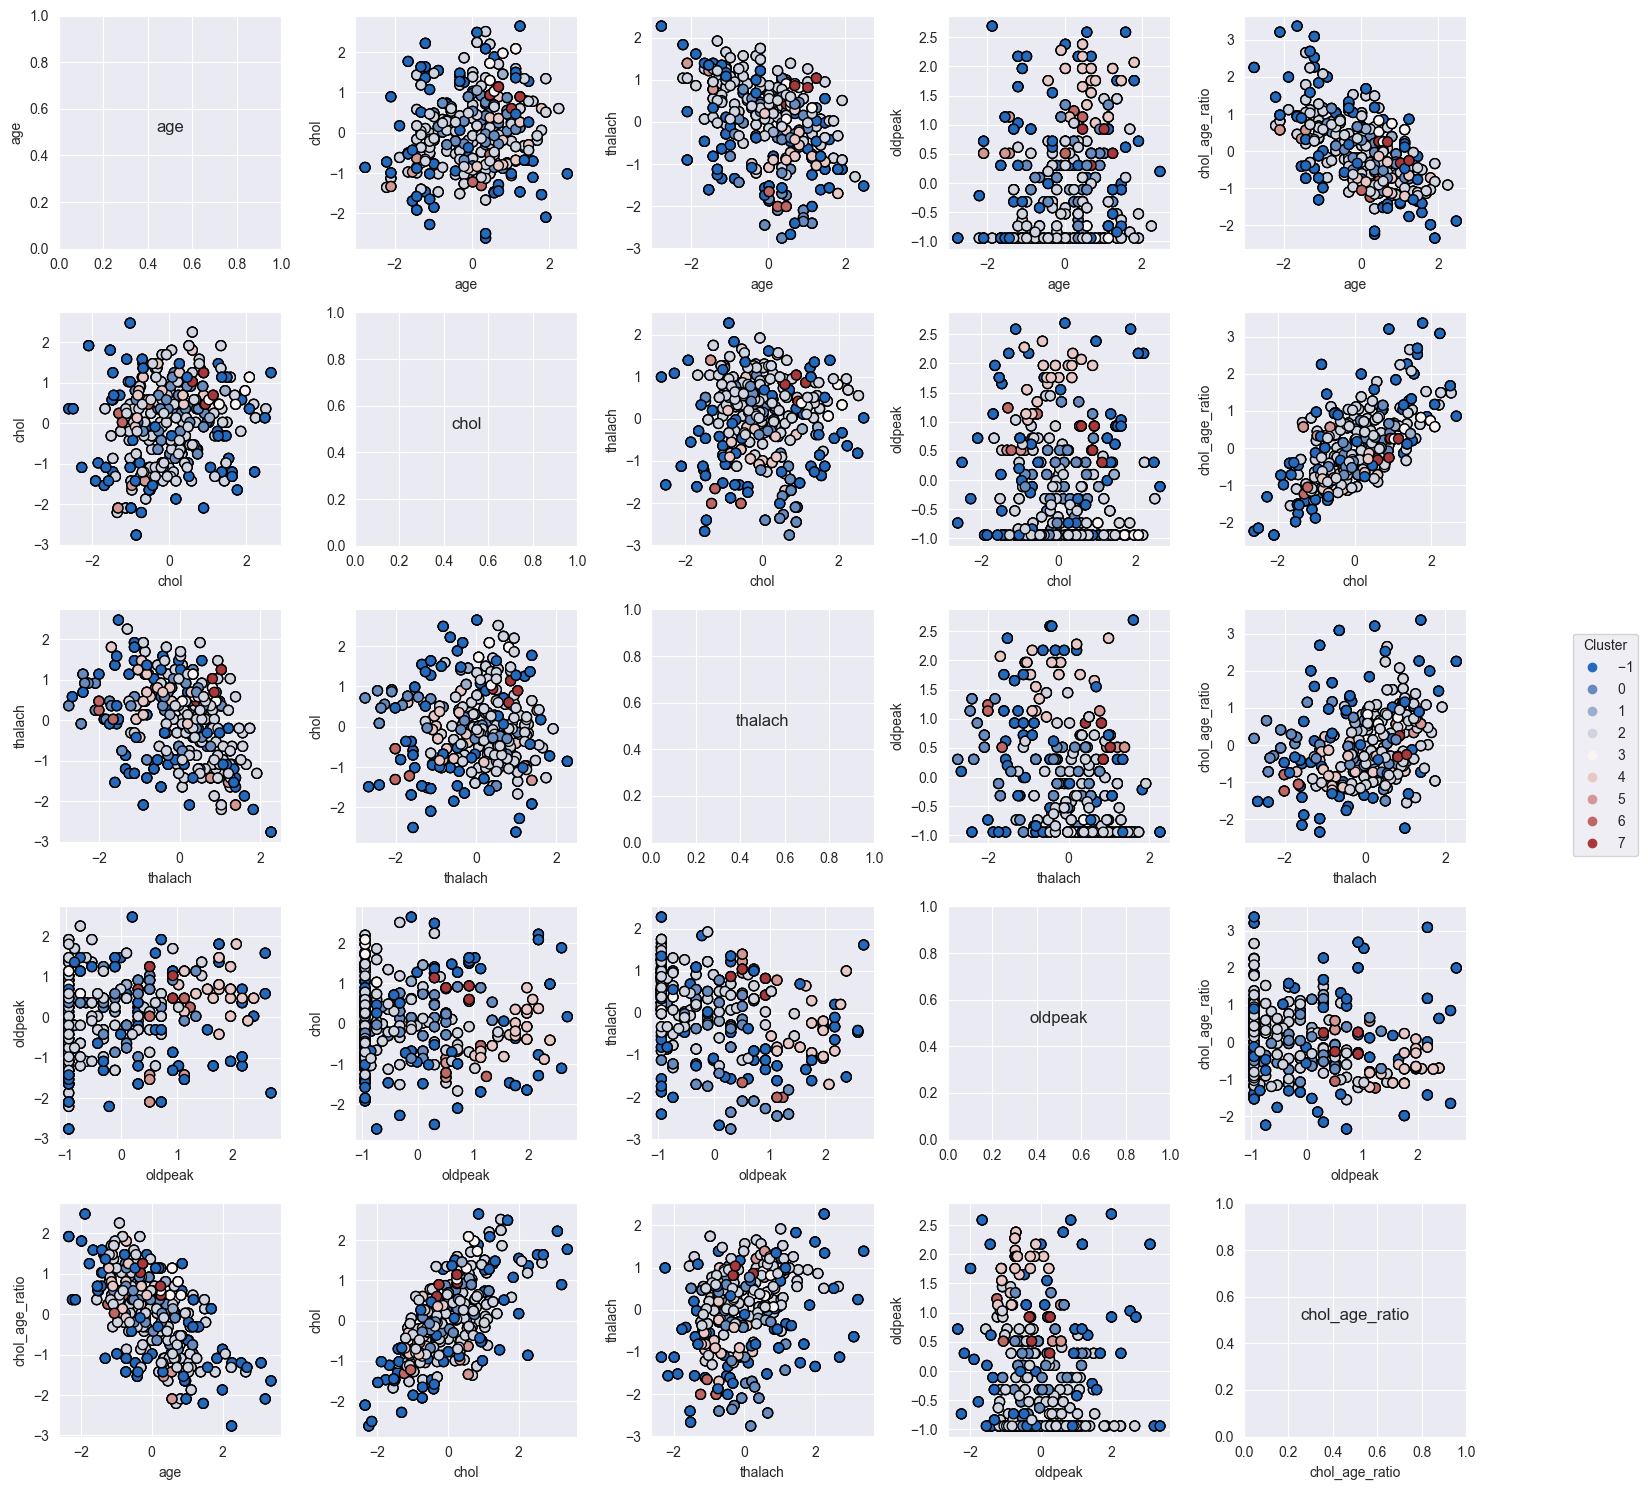

In [48]:
eps = 1.0
min_samples = 10
dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
df['cluster_dbscan'] = dbscan_model.fit_predict(df_scaled)

# Crear subplots para todos los pares de características
num_features = len(select)
fig, axes = plt.subplots(num_features, num_features, figsize=(15, 15))

for i in range(num_features):
    for j in range(num_features):
        if i != j:
            scatter = axes[i, j].scatter(df_scaled.iloc[:, i], df_scaled.iloc[:, j], c=df['cluster_dbscan'], cmap='vlag', marker='o', edgecolor='k', s=50)
            axes[i, j].set_xlabel(select[i])
            axes[i, j].set_ylabel(select[j])
        else:
            axes[i, j].text(0.5, 0.5, select[i], fontsize=12, ha='center')
        
        if i == num_features - 1:
            axes[i, j].set_xlabel(select[j])
        if j == 0:
            axes[i, j].set_ylabel(select[i])

# Añadir una leyenda para los clusters
handles, labels = scatter.legend_elements()
fig.legend(handles, labels, title="Cluster", loc='center right', bbox_to_anchor=(1.1, 0.5))

plt.tight_layout()
plt.show()

#### OPTICS

OPTICS (Ordering Points To Identify the Clustering Structure) es un algoritmo de clustering basado en la densidad que destaca por su capacidad para proporcionar una representación detallada de la estructura de densidad a diferentes escalas en los datos. Esto permite la identificación eficiente de clusters de diversos tamaños y la detección de puntos de ruido en el conjunto de datos. 


In [49]:
eps_values = [0.5,0.6,0.7,0.8,0.9,1.0,1.5,2]
min_samples_values = [5,7,8,9,10,15,20]


# Iterar sobre diferentes combinaciones de eps y min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        optics_model = OPTICS(eps=eps, min_samples=min_samples, cluster_method='dbscan')
        df['cluster_optics'] = optics_model.fit_predict(df_scaled)

        # Silhouette Score
        silhouette = silhouette_score(df_scaled, df['cluster_optics'])

        # Índice de Rand Ajustado
        label_encoder = LabelEncoder()
        ground_truth_labels = label_encoder.fit_transform(df['target'])
        adjusted_rand = adjusted_rand_score(ground_truth_labels, df['cluster_optics'])

        # número de clusters generados
        num_unique_clusters = df['cluster_optics'].nunique()

        print(f"OPTICS Result (eps={eps}, minPts={min_samples}): Silhouette Score = {silhouette}, Adjusted Rand Index = {adjusted_rand}, Clústers generados: {num_unique_clusters}")

OPTICS Result (eps=0.5, minPts=5): Silhouette Score = -0.23701459619472773, Adjusted Rand Index = -0.006868918200120037, Clústers generados: 25
OPTICS Result (eps=0.5, minPts=7): Silhouette Score = -0.26211440823594034, Adjusted Rand Index = -0.002334103616585519, Clústers generados: 19
OPTICS Result (eps=0.5, minPts=8): Silhouette Score = -0.2925678342541869, Adjusted Rand Index = -0.002521206090809562, Clústers generados: 14
OPTICS Result (eps=0.5, minPts=9): Silhouette Score = -0.2901024125528663, Adjusted Rand Index = -0.012375873531632792, Clústers generados: 10
OPTICS Result (eps=0.5, minPts=10): Silhouette Score = -0.28984685759322865, Adjusted Rand Index = -0.011343515257375252, Clústers generados: 9
OPTICS Result (eps=0.5, minPts=15): Silhouette Score = -0.19159140845040962, Adjusted Rand Index = -0.012772053478481907, Clústers generados: 3
OPTICS Result (eps=0.5, minPts=20): Silhouette Score = -0.053849038382382856, Adjusted Rand Index = -0.008597088252163312, Clústers genera

Nuevamente, nos pasa como en el modelo `DBSCAN` o encontramos valores o muy altos en Silhouette Score o alto de Adjusted Rand Index. En este caso para un valor más alto de Silhouette (0.340) establecemos `eps`=1.5 y `minPts` entre 5 y 9. En cambio, para un valor más alto de ARI (0.459) establecemos `eps`=1.0 y `minPts` entre 7 y 10. Nuevamente, dado que nuestra prioridad es clasificar adecuadamente los pacientes que padecen cardiopatías optaremos por un valor de ARI superior antes que un valor más alto de Silhouette:

`OPTICS Result (eps=1.0, minPts=9): Silhouette Score = -0.10240919783004208, Adjusted Rand Index = 0.45972888665106154, Clústers generados: 9`

Como en el caso anterior, vamos a visualizar dicho Kmeans.

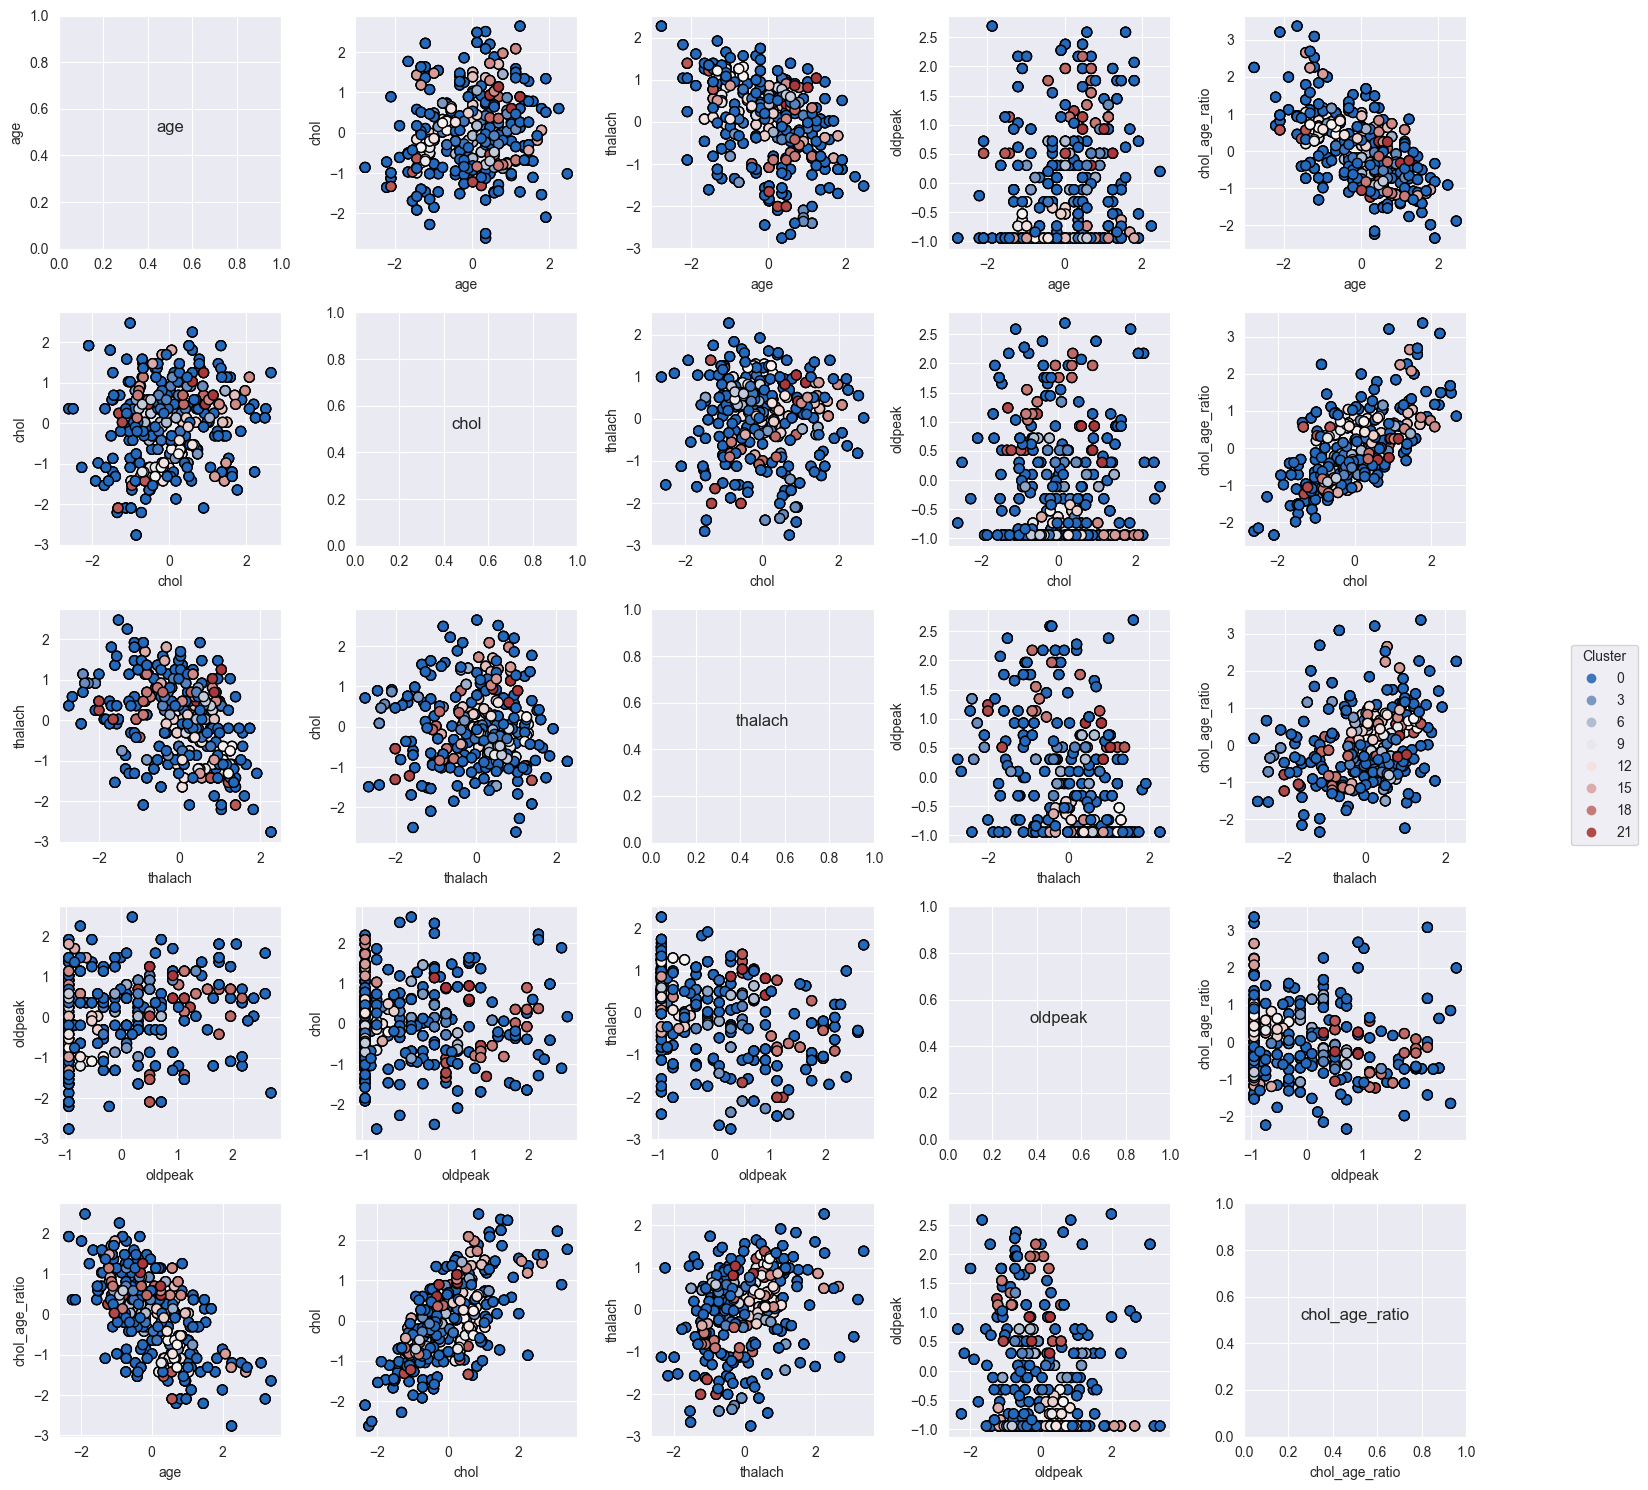

In [50]:
optics_model = OPTICS(min_samples=9, max_eps=1.0)
df['cluster_optics'] = optics_model.fit_predict(df_scaled)

# Crear subplots para todos los pares de características
num_features = len(select)
fig, axes = plt.subplots(num_features, num_features, figsize=(15, 15))

for i in range(num_features):
    for j in range(num_features):
        if i != j:
            scatter = axes[i, j].scatter(df_scaled.iloc[:, i], df_scaled.iloc[:, j], c=df['cluster_optics'], cmap='vlag', marker='o', edgecolor='k', s=50)
            axes[i, j].set_xlabel(select[i])
            axes[i, j].set_ylabel(select[j])
        else:
            axes[i, j].text(0.5, 0.5, select[i], fontsize=12, ha='center')
        
        if i == num_features - 1:
            axes[i, j].set_xlabel(select[j])
        if j == 0:
            axes[i, j].set_ylabel(select[i])

# Añadir una leyenda para los clusters
handles, labels = scatter.legend_elements()
fig.legend(handles, labels, title="Cluster", loc='center right', bbox_to_anchor=(1.1, 0.5))

plt.tight_layout()
plt.show()

### 3.2 Se comparan los resultados obtenidos de los modelos DBSCAN y Optics.

Para comparar los modelos recogeremos los valores de `Silhouette Score` y `Adjusted Rand Index`:
- **Silhouette Score:**
    -  OPTICS. -0.10240919783004208
    -  DBSCAN. -0.1018078677697963
- **Adjusted Rand Index:**
    - OPTICS.  0.45972888665106154
    - DBSCAN. 0.4577871335604196

Podemos ver como en ambos casos son prácticamente iguales. Hay muy poca diferencia entre los valores obtenidos con un modelo y otro, aún que, si nos regimos como anteriormente en seleccionar el modelo que identifique mejor las personas con cardiopatías, es decr el valor ARI, podemos determinar que Optics es ligeramente mejor. Por otro lado, en ambos casos encontramos una distribución de 9 clústers.

### 3.3 Se comparan los resultados obtenidos de los modelos anteriores y DBSCAN.

Si recogemos los modelos anteriores y comparamos los valores de  `Silhouette Score` y `Adjusted Rand Index`:

- **Silhouette Score**:
    - Modelo con Distancia Euclidiana: 0.252
    - Modelo con Distancia Coseno: 0.352
    - DBSCAN: -0.1018078677697963

- **Adjusted Rand Index**:
    - Modelo con Distancia Euclidiana: 0.065
    - Modelo con Distancia Coseno: 0.103
    - DBSCAN: 0.4577871335604196

Sin duda si la prioridad es tener unos clústers definidos optaremos por realizar el modelo con distancia Coseno, aunque, la distancia Euclidiana es ciertamente más alta también que DBSCAN. En cambio, como nuestro objetivo es identificar correctamente las personas que padecen cardiopatías, en este caso, DBSCAN es mucho mejor. Sigue siendo un valor no muy alto pero si mayor que los dos modelos anteriores. 

## Ejercicio 4

### 4.1 Se seleccionan las muestra de entrenamiento y test.

In [51]:
df_db_opt = df.copy()
df = df_original.copy()
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4.2 justifican las proporciones seleccionadas.

Para realizar este ejercicio utilizaremos una proporción 80-20. De esta manera tendremos un 80% del dataset para entrenar el modelo, siendo este, un valor suficientemente alto de registros para construir las relaciones significativas entre las variables predictoras y nuestra variable objetivo. Por otro lado, con el 20% tendremos suficiente información para comprobar la veracidad del modelo.

## Ejercicio 5

### 5.1 Se generan reglas y se seleccionan e interpretan las más significativas.

Procedemos a realizar el árbol de decisión.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.backends.backend_pdf

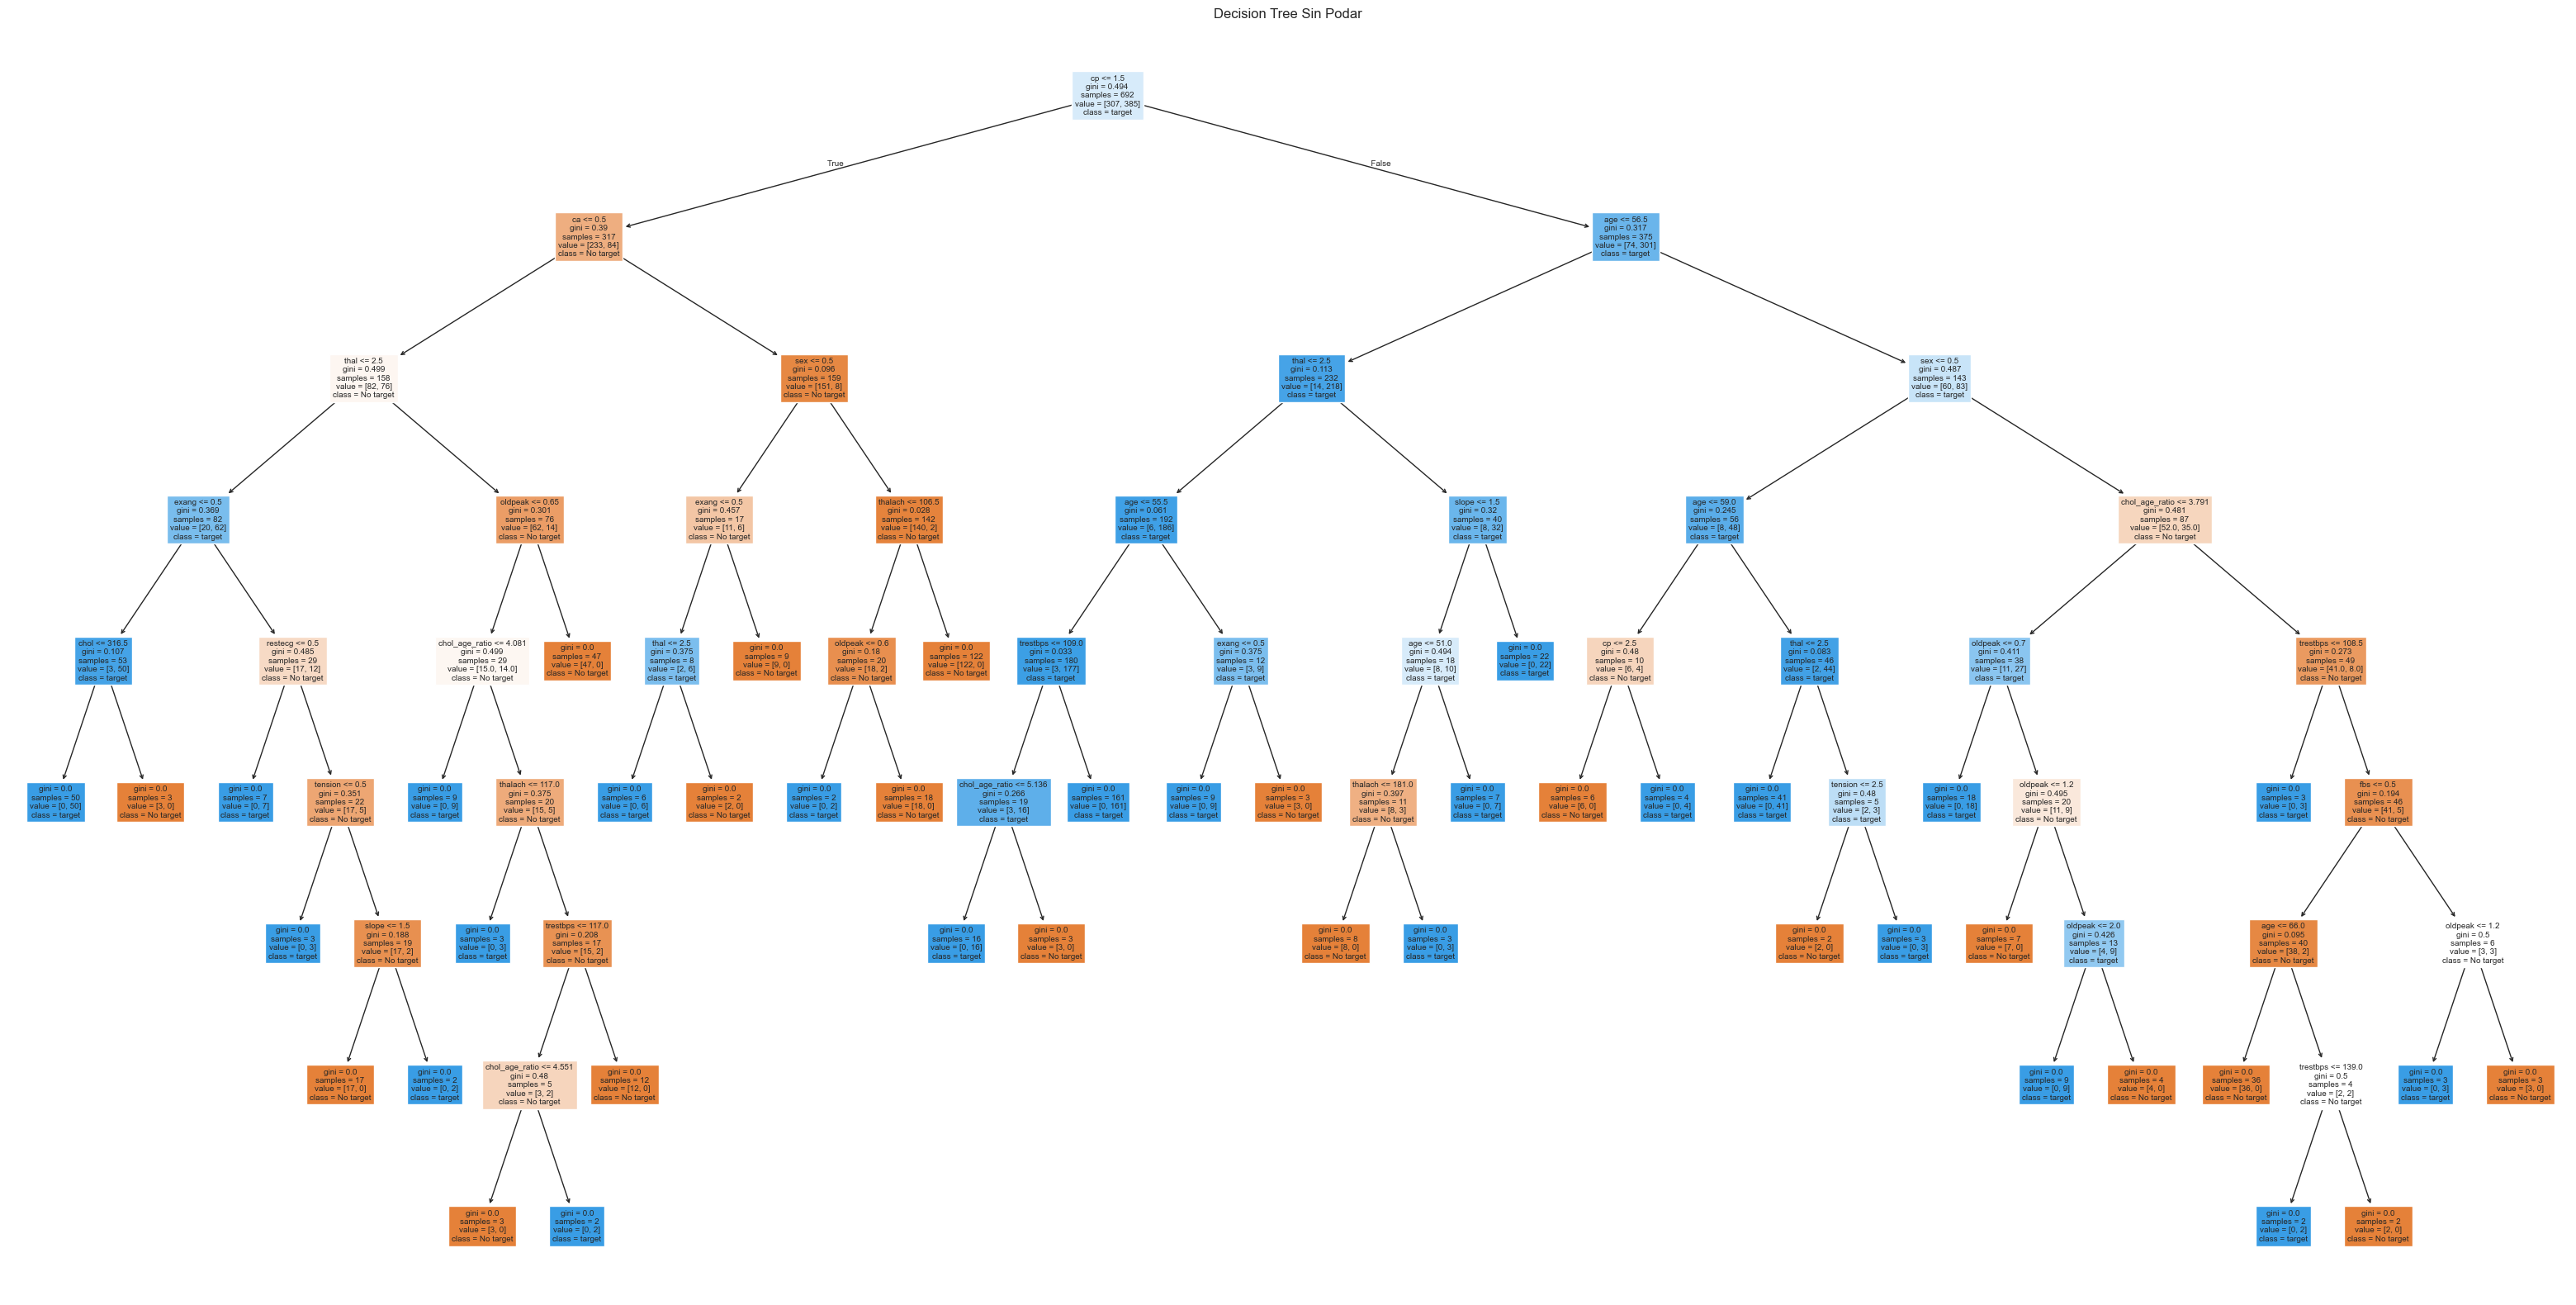

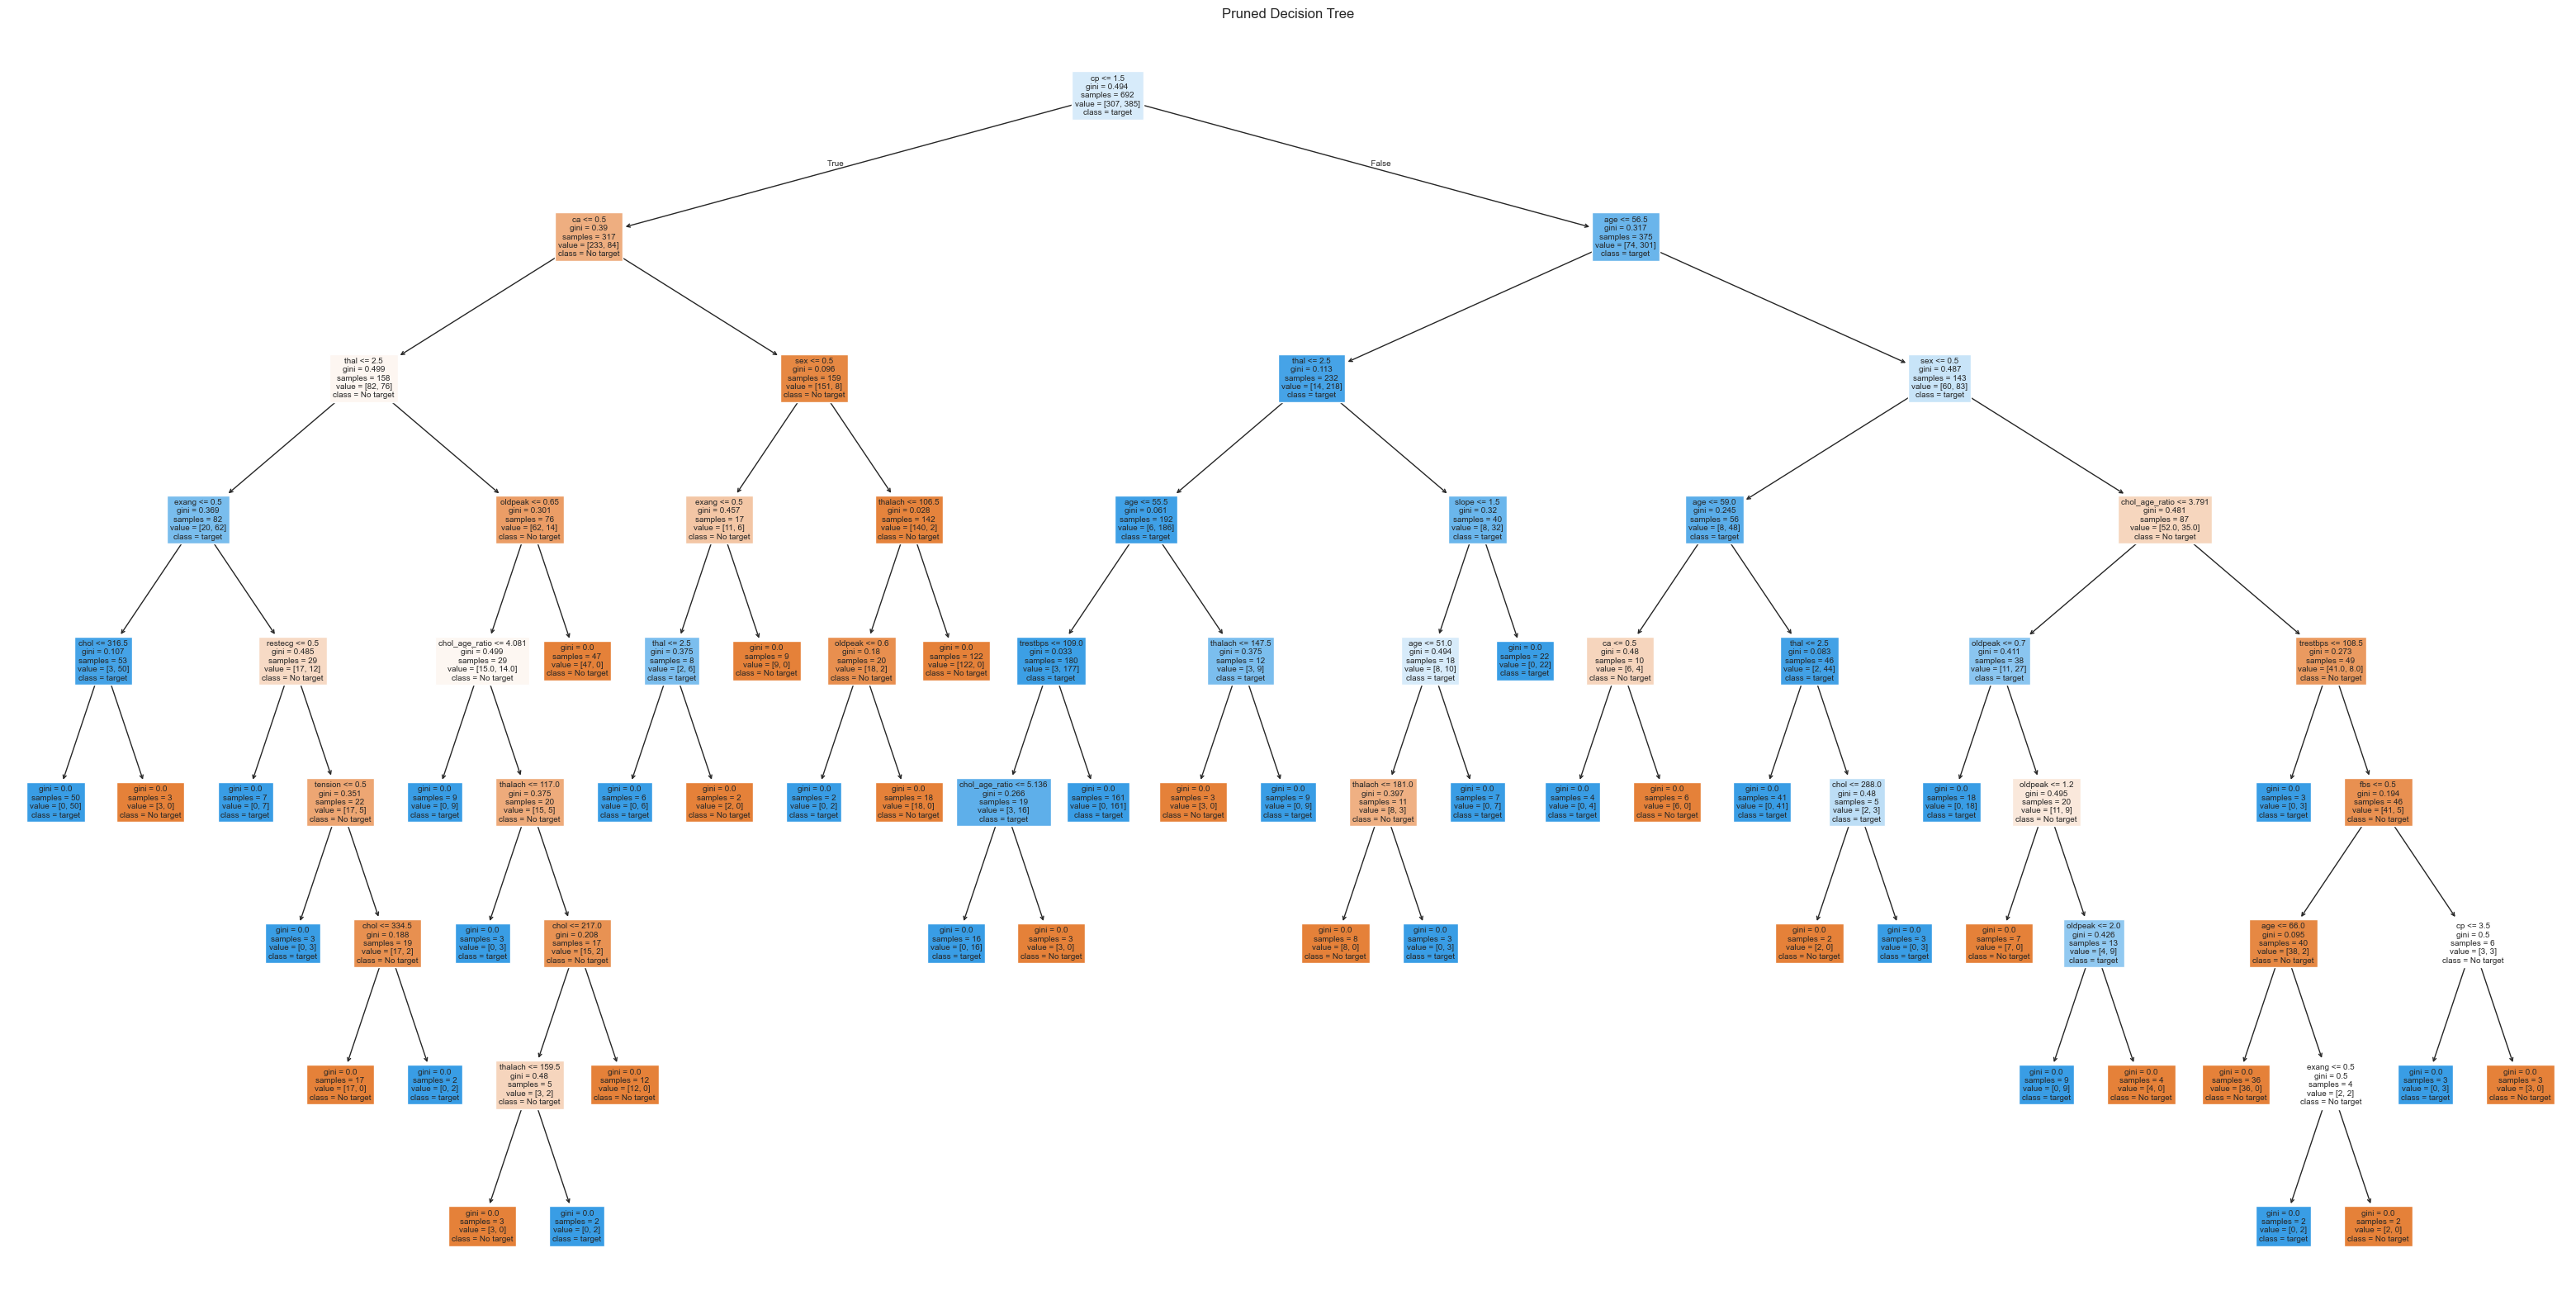

In [53]:
# Crear y entrenar el árbol de decisión sin poda
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba con el árbol sin podar
y_pred_unpruned = tree_clf.predict(X_test)

# Arbol podado
path = tree_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

alpha_scores = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=10, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    alpha_scores.append((ccp_alpha, np.mean(scores), np.std(scores)))

alpha_results = pd.DataFrame(alpha_scores, columns=["ccp_alpha", "mean_accuracy", "std_accuracy"])

optimal_alpha = alpha_results.loc[alpha_results['mean_accuracy'].idxmax()]['ccp_alpha']

pruned_tree_clf = DecisionTreeClassifier(random_state=10, ccp_alpha=optimal_alpha)
pruned_tree_clf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba con el árbol podado
y_pred_pruned = pruned_tree_clf.predict(X_test)

fig_unpruned, ax_unpruned = plt.subplots(figsize=(40, 20))  #
plot_tree(tree_clf, feature_names=X.columns, filled=True, ax=ax_unpruned, class_names=['No target', 'target'])
plt.title("Decision Tree Sin Podar")
plt.show()

pdf_unpruned = matplotlib.backends.backend_pdf.PdfPages("unpruned_tree.pdf")
pdf_unpruned.savefig(fig_unpruned)
pdf_unpruned.close()

fig_pruned, ax_pruned = plt.subplots(figsize=(40, 20))  # Ajusta el tamaño según tus necesidades
plot_tree(pruned_tree_clf, feature_names=X.columns, filled=True, ax=ax_pruned, class_names=['No target', 'target'])
plt.title("Pruned Decision Tree")
plt.show()

pdf_pruned = matplotlib.backends.backend_pdf.PdfPages("pruned_tree.pdf")
pdf_pruned.savefig(fig_pruned)
pdf_pruned.close()



### 5.2 Se extraen las reglas del modelo en formato texto y gráfico.


In [54]:
tree_rules = export_text(tree_clf, feature_names=list(X_train.columns))

print("Reglas de Decisión:")
print(tree_rules)

Reglas de Decisión:
|--- cp <= 1.50
|   |--- ca <= 0.50
|   |   |--- thal <= 2.50
|   |   |   |--- exang <= 0.50
|   |   |   |   |--- chol <= 316.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- chol >  316.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- exang >  0.50
|   |   |   |   |--- restecg <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- restecg >  0.50
|   |   |   |   |   |--- tension <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- tension >  0.50
|   |   |   |   |   |   |--- slope <= 1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- slope >  1.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |--- thal >  2.50
|   |   |   |--- oldpeak <= 0.65
|   |   |   |   |--- chol_age_ratio <= 4.08
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- chol_age_ratio >  4.08
|   |   |   |   |   |--- thalach <= 117.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- thalach >  117.00
|   |   |   |

Recordemos que este árbol de decisión se ha construido para predecir si una persona padece cardiopatías o no (0 o 1) basándose en varias características del paciente, como el género, si padece dolor de pecho, el historial crediticio, presión arterial, etc.

Nodo Raíz: El nodo raíz divide los datos en dos ramas principales según que tipo de dolor de pecho padece la persona. Si el valor es superior a 1.50 (puede ser 1,2,3,4), se sigue la rama izquierda; si es mayor, se sigue la rama derecha.

Rama Izquierda (dolor de pecho <= 1.50): Esta rama evalúa varias características, incluyendo el género dl paciente, la frecuencia cardiaca máxima alcanzada, la cantidad de serum colesterol en sangre, entre otras. Con base en estas características, se generan divisiones adicionales que agrupan a los solicitantes en subgrupos más específicos. Dependiendo del valor de estas características, se toman decisiones hasta llegar a una predicción final sobre la clase target (si padece cardiopatías).

Rama Derecha (dolor de pecho > 1.50): En esta rama se consideran otras características adicionales, como la presión arterial en reposo, la diferencia del ST en reposo y acostado y la edad. Similar a la rama izquierda, las decisiones se basan en los valores de estas características para finalmente predecir la clase de riesgo crediticio.

### 5.3 Matriz de confusión

In [55]:
# Calcular la matriz de confusión para el árbol sin podar
conf_matrix_unpruned = confusion_matrix(y_test, y_pred_unpruned)
tn_u, fp_u, fn_u, tp_u = conf_matrix_unpruned.ravel()
print("Matriz de Confusión - Árbol Sin Podar:")
print(f"Verdaderos Positivos (TP): {tp_u}")
print(f"Verdaderos Negativos (TN): {tn_u}")
print(f"Falsos Positivos (FP): {fp_u}")
print(f"Falsos Negativos (FN): {fn_u}")

# Calcular la matriz de confusión para el árbol podado
conf_matrix_pruned = confusion_matrix(y_test, y_pred_pruned)
tn_p, fp_p, fn_p, tp_p = conf_matrix_pruned.ravel()
print("\nMatriz de Confusión - Árbol Podado:")
print(f"Verdaderos Positivos (TP): {tp_p}")
print(f"Verdaderos Negativos (TN): {tn_p}")
print(f"Falsos Positivos (FP): {fp_p}")
print(f"Falsos Negativos (FN): {fn_p}")

# Calcular el reporte de clasificación para el árbol sin podar
class_report_unpruned = classification_report(y_test, y_pred_unpruned)
print("\nReporte de Clasificación - Árbol Sin Podar:\n", class_report_unpruned)

# Calcular el reporte de clasificación para el árbol podado
class_report_pruned = classification_report(y_test, y_pred_pruned)
print("\nReporte de Clasificación - Árbol Podado:\n", class_report_pruned)


Matriz de Confusión - Árbol Sin Podar:
Verdaderos Positivos (TP): 96
Verdaderos Negativos (TN): 74
Falsos Positivos (FP): 0
Falsos Negativos (FN): 3

Matriz de Confusión - Árbol Podado:
Verdaderos Positivos (TP): 96
Verdaderos Negativos (TN): 74
Falsos Positivos (FP): 0
Falsos Negativos (FN): 3

Reporte de Clasificación - Árbol Sin Podar:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        74
           1       1.00      0.97      0.98        99

    accuracy                           0.98       173
   macro avg       0.98      0.98      0.98       173
weighted avg       0.98      0.98      0.98       173


Reporte de Clasificación - Árbol Podado:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        74
           1       1.00      0.97      0.98        99

    accuracy                           0.98       173
   macro avg       0.98      0.98      0.98       173
weighted avg    

Podemos ver como para los dos modelos encontramos unos valores muy positivos. Encontramos un 0.98 de accuracy. Donde se determinan correctamente 96 casos positivos y 74 negativos. Solo encontramos 3 falsos negativos. Sin duda unos resultados excepcionales. 

Podemos concluir entonces que no es necesario realizar el árbol podado, ya que, con el arbol sin podar obtenemos prácticamente el 100% de acierto a la hora de clasificar si una persona padece cardiopatías o no.

## Ejercicio 6

### 6.1 Se prueba con una variación u otro enfoque algorítmico.

Aun teniendo unos resultados excepcionales vamos a realizar un nuevo modelo de predicción, en este caso Random Forest.

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)


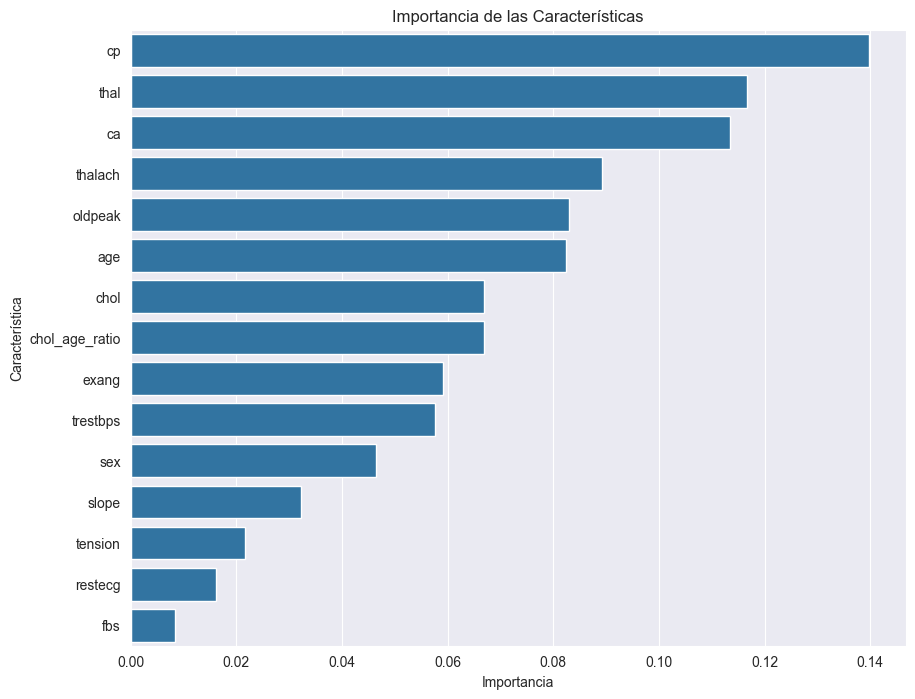

In [57]:
# Importancia de las características
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Crear un DataFrame para las importancias de las características
feat_importances = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feat_importances = feat_importances.sort_values(by='Importance', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feat_importances)
plt.title('Importancia de las Características')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()

In [58]:
class_report = classification_report(y_test, y_pred)
print("Reporte de Clasificación:\n", class_report)

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       1.00      1.00      1.00        99

    accuracy                           1.00       173
   macro avg       1.00      1.00      1.00       173
weighted avg       1.00      1.00      1.00       173



In [59]:
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
print("Matriz de Confusión:")
print(f"Verdaderos Positivos (TP): {tp}")
print(f"Verdaderos Negativos (TN): {tn}")
print(f"Falsos Positivos (FP): {fp}")
print(f"Falsos Negativos (FN): {fn}")

Matriz de Confusión:
Verdaderos Positivos (TP): 99
Verdaderos Negativos (TN): 74
Falsos Positivos (FP): 0
Falsos Negativos (FN): 0


Podemos ver como antes teníamos valores altos, pues ahora sin duda lo son más. El random forest es capaz de predecir con un 100% de exactitud las personas que padecen cardiopatía y a las que no. Sin duda, los modelos no supervisados nos han dado valores más altos que los supervisados. Recordando que los valores resultantes para el arbol de decisiones fue:

               precision    recall  f1-score   support

           0       0.96      1.00      0.98        74
           1       1.00      0.97      0.98        99

    accuracy                           0.98       173
   macro avg       0.98      0.98      0.98       173
weighted avg       0.98      0.98      0.98       173


- Verdaderos Positivos (TP): 96
- Verdaderos Negativos (TN): 74
- Falsos Positivos (FP): 0
- Falsos Negativos (FN): 3

Podemos ver como esos 3 Falsos negativos esta vez han sido catalogados correctamente como personas con cardiopatías. Sin duda unos valores excepcionales.

## Ejercicio 7

Al aplicar modelos supervisados y no supervisados al dataset de cardiopatías, se deben considerar varias limitaciones inherentes a los datos para entender mejor los posibles desafíos y restricciones en los resultados obtenidos. Estas limitaciones pueden influir en la precisión y generalización de los modelos predictivos. A continuación, se presentan algunas de estas limitaciones:
1. **Volatilidad de las Condiciones de Salud**. Las condiciones de salud de los pacientes pueden cambiar significativamente con el tiempo debido a factores como cambios en el estilo de vida, tratamientos médicos, y envejecimiento. Esto puede afectar la estabilidad y consistencia de las relaciones entre las variables, lo que resulta en agrupaciones menos claras o predecibilidad en los modelos supervisados. Concepto que sin duda hemos podido comprobar.
2. **Los datos se recopilaron en diferentes períodos y lugares, y las prácticas médicas pueden haber cambiado con el tiempo.** Estos cambios pueden incluir nuevos tratamientos, mejoras en los diagnósticos, y cambios en las recomendaciones médicas. Los modelos entrenados en datos de un período específico pueden no generalizarse bien a datos futuros debido a estos cambios en las prácticas médicas.
3. **El dataset proviene de cuatro instituciones específicas y puede no ser representativo de la población general.** Esto introduce un sesgo de selección, lo que puede limitar la capacidad de los modelos para generalizar los resultados a otras poblaciones o regiones. La diversidad genética, cultural y ambiental puede influir significativamente en la prevalencia y presentación de las cardiopatías.


Con respecto a los riesgos del uso de los modelos encontramos
1. **Overfitting.** Los modelos demasiado complejos pueden ajustarse demasiado a los datos de entrenamiento, capturando el ruido y las peculiaridades de los datos en lugar de las tendencias generales. Esto puede llevar a un mal rendimiento en datos no vistos. Esto puede provocar que el modelo se ajuste perfectamente a los datos de entrenamiento pero fallen a la hora de predecir pacientes nuevos que no sigan exactamente los grupos establecidos en el entrenamiento.
2. **Underfitting**. Los modelos demasiado simples pueden no capturar la complejidad subyacente de los datos, llevando a un rendimiento pobre tanto en el conjunto de entrenamiento como en el de prueba. En este caso nos encontramos con características ciertamente complejas para predecir las cardiopatías. 
3. **Interpretabilidad**. Los modelos complejos, como los Random Forest o las redes neuronales, pueden ser difíciles de interpretar, lo que dificulta la comprensión de cómo se toman las decisiones. Esto puede ser un problema a la hora de ganar la confianza por parte de los profesionales médicos, limitando su uso en la práctica clínica. También puede comportar que sea dificil de explicar las decisiones tomadas para su diagnóstico a los pacientes. 
4. **Riesgo de uso**. Las decisiones fundamentadas en modelos pueden tener consecuencias significativas, especialmente en el ámbito de la salud, donde los diagnósticos y tratamientos incorrectos pueden tener graves implicaciones. Un modelo que predice incorrectamente la ausencia de una cardiopatía en un paciente puede llevar a la falta de tratamiento adecuado, aumentando el riesgo de eventos cardíacos adversos.
